In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

import joblib

In [44]:
df=pd.read_csv('fraud loan prediction.csv')
pd.set_option('display.max_columns',None)

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df.shape

(614, 13)

In [47]:
df.dtypes  #dependents columns is in object type but the data are numerical. 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

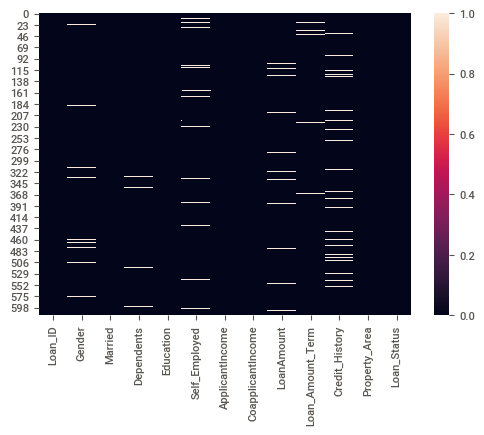

In [48]:
sns.heatmap(df.isnull())#there are missing values in the dataset

In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA by sweetviz library

In [9]:
import sweetviz

In [10]:
my_report=sweetviz.analyze([df,'df'],target_feat='Loan_Status')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [11]:
my_report.show_html('fraudloandetectionriv-1.html')

Report fraudloandetectionriv-1.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Imputing missing values

In [51]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])    #numeric but treated as object.not changing dtype.
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [52]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [54]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

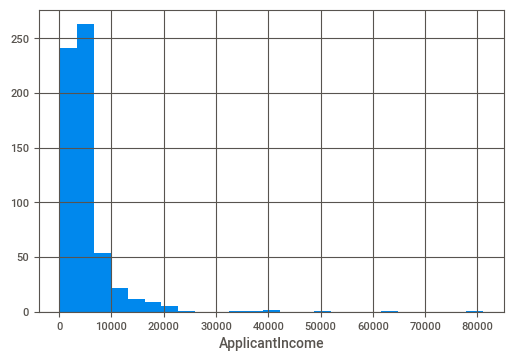

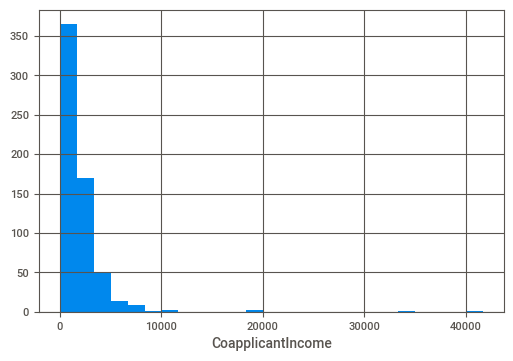

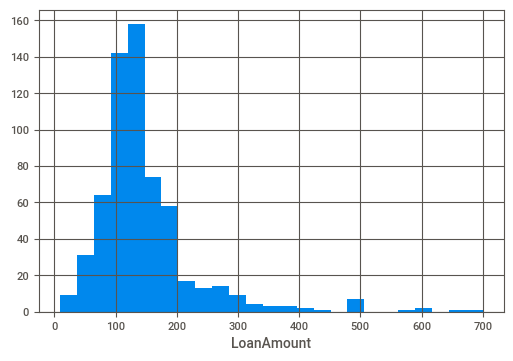

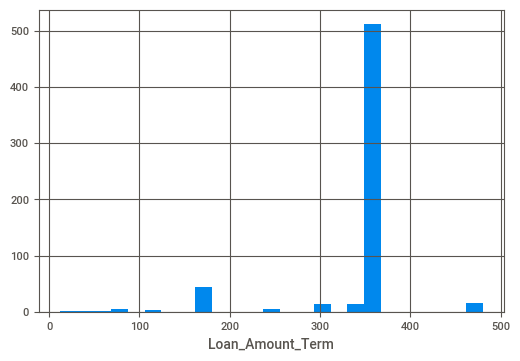

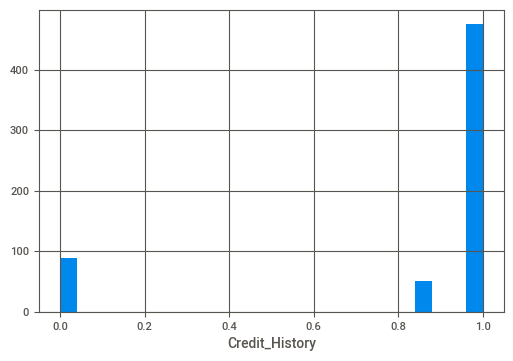

In [16]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [17]:
#checking relation of each attribute w.r.t target attribute

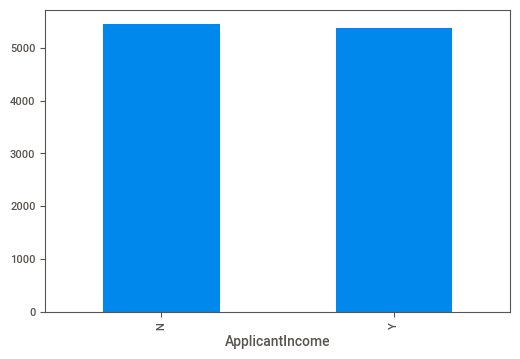

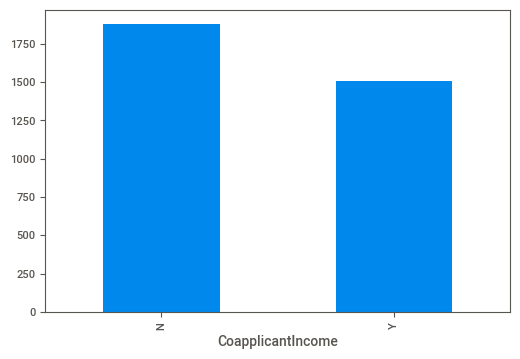

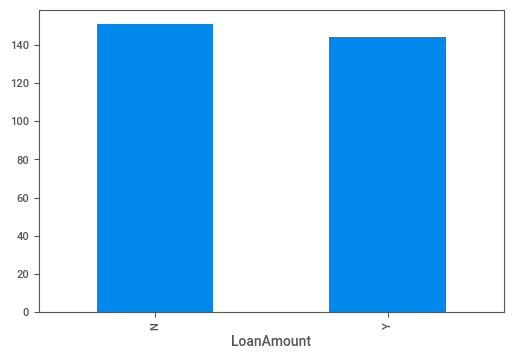

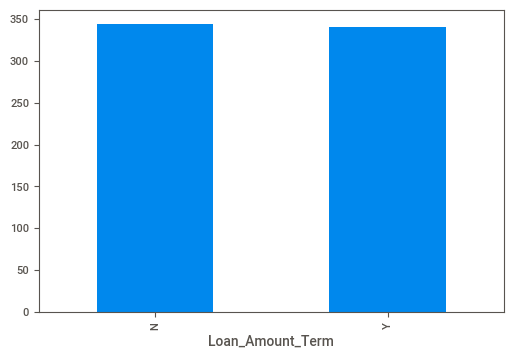

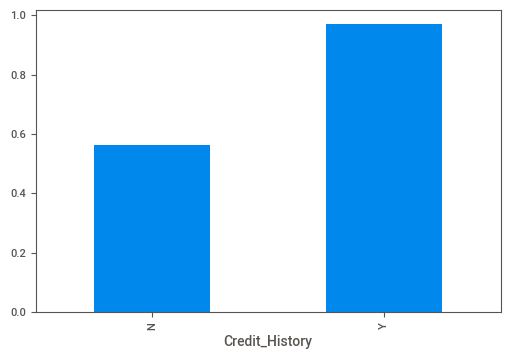

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df.groupby('Loan_Status')[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()


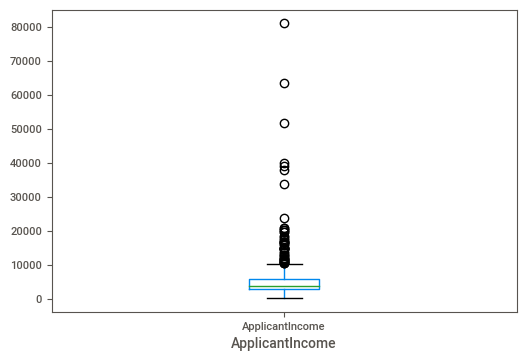

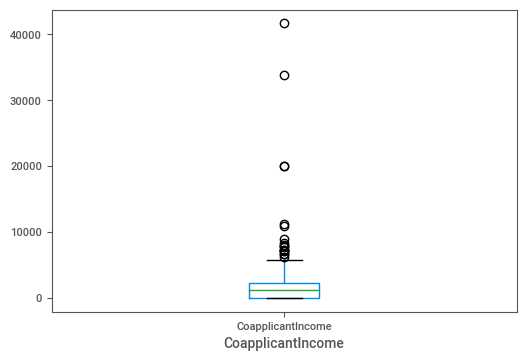

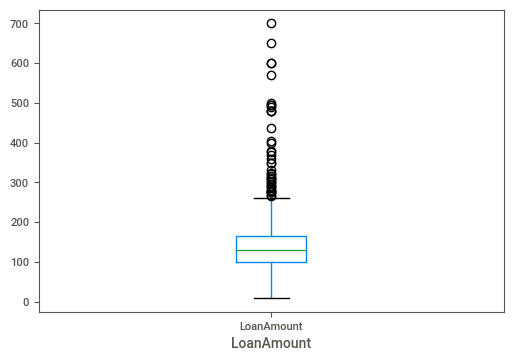

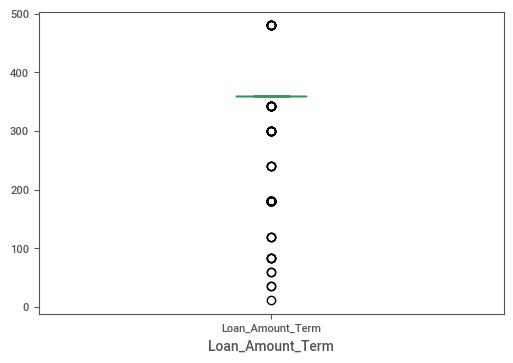

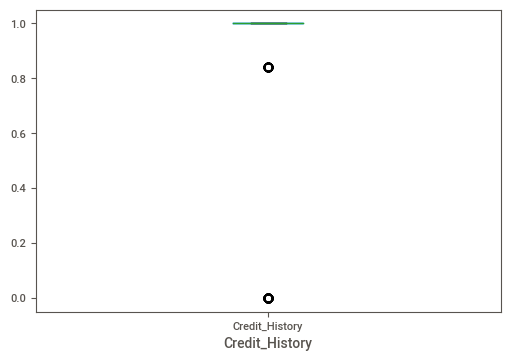

In [19]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

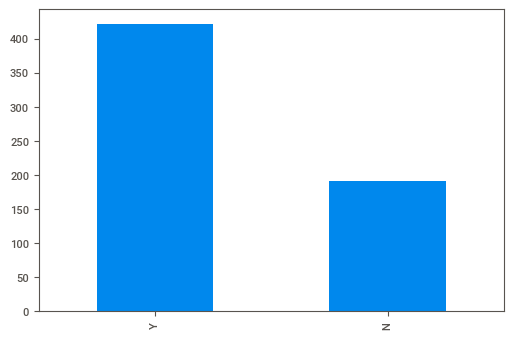

In [20]:
#Imbalanced dataset,will do oversampling to balance the data before model building.
df['Loan_Status'].value_counts().plot.bar()

# Feature Engineering

In [55]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [56]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=2:
        print(feature,df[feature].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


In [57]:
#Replacing instead of label encoding because we want Yes=1 & No=0
df['Loan_Status']=df['Loan_Status'].replace(['Y','N'],[1,0])

In [58]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Segregating target(label) and independent features

In [59]:
y=df[['Loan_Status']]
x=df.drop(['Loan_Status'],axis=1)

In [60]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [61]:
x_ovrsampled,y_oversampled=ros.fit_sample(x,y)

In [62]:
print(x.shape,x_ovrsampled.shape)
print(y.shape,y_oversampled.shape)

(614, 12) (844, 12)
(614, 1) (844, 1)


In [63]:
x_ovrsampled.shape[0]-x.shape[0] #Exta rows added due to oversampling technique.

230

In [64]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [65]:
y_oversampled['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [66]:
x_ovrsampled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [67]:
y_oversampled.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [68]:
df=x_ovrsampled

# Making dummies

In [69]:
df=pd.concat([df,pd.get_dummies(df['Gender'],prefix=str('Gender'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Married'],prefix=str('Married'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Dependents'],prefix=str('Dependents'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Education'],prefix=str('Education'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Self_Employed'],prefix=str('Self_Employed'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Property_Area'],prefix=str('Property_Area'),prefix_sep='_')],axis=1)


In [70]:
df.shape

(844, 27)

In [71]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [72]:
#dropping columns as we have extracted data by dummies technique
df=df.drop(['Loan_ID','Married','Gender','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [73]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [74]:
df.corr()
##none of the negatively correlated columns with the target have very high values.no need to delete any column.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.135540,0.527429,-0.006863,0.044676,-0.097233,0.097233,-0.054354,0.054354,-0.083052,0.096995,-0.054485,0.078992,0.158442,-0.158442,-0.115123,0.115123,0.022202,0.017441,-0.039327
CoapplicantIncome,-0.135540,1.000000,0.309448,-0.231123,0.022320,0.091035,-0.091035,0.035926,-0.035926,-0.108111,-0.055971,-0.009754,0.259662,0.080487,-0.080487,0.014149,-0.014149,-0.068203,-0.072303,0.139615
LoanAmount,0.527429,0.309448,1.000000,-0.014633,0.042433,-0.071618,0.071618,-0.086504,0.086504,-0.152309,0.059217,-0.016977,0.195223,0.182148,-0.182148,-0.088364,0.088364,0.027151,-0.022996,-0.003584
Loan_Amount_Term,-0.006863,-0.231123,-0.014633,1.000000,-0.019632,0.020381,-0.020381,0.066706,-0.066706,0.158606,-0.091550,-0.007020,-0.135874,0.047981,-0.047981,0.039510,-0.039510,0.058403,0.057596,-0.115220
Credit_History,0.044676,0.022320,0.042433,-0.019632,1.000000,-0.021852,0.021852,0.005523,-0.005523,0.040646,-0.015175,0.023700,-0.075909,0.117775,-0.117775,0.016606,-0.016606,0.049852,-0.003107,-0.045860
Gender_Female,-0.097233,0.091035,-0.071618,0.020381,-0.021852,1.000000,-1.000000,0.359026,-0.359026,0.126847,-0.005731,-0.137826,-0.035200,0.051209,-0.051209,0.025586,-0.025586,-0.099267,0.063925,0.033341
Gender_Male,0.097233,-0.091035,0.071618,-0.020381,0.021852,-1.000000,1.000000,-0.359026,0.359026,-0.126847,0.005731,0.137826,0.035200,-0.051209,0.051209,-0.025586,0.025586,0.099267,-0.063925,-0.033341
Married_No,-0.054354,0.035926,-0.086504,0.066706,0.005523,0.359026,-0.359026,1.000000,-1.000000,0.307071,-0.118464,-0.235133,-0.071332,0.027996,-0.027996,0.024620,-0.024620,0.022688,-0.044275,0.022168
Married_Yes,0.054354,-0.035926,0.086504,-0.066706,-0.005523,-0.359026,0.359026,-1.000000,1.000000,-0.307071,0.118464,0.235133,0.071332,-0.027996,0.027996,-0.024620,0.024620,-0.022688,0.044275,-0.022168
Dependents_0,-0.083052,-0.108111,-0.152309,0.158606,0.040646,0.126847,-0.126847,0.307071,-0.307071,1.000000,-0.528744,-0.489696,-0.383084,-0.005060,0.005060,0.142026,-0.142026,0.063796,-0.010650,-0.051987


# Removing outliers(not removing outliers as data we have is alredy less.)

# Applying Power transformation to remove skewness

In [75]:
df.skew()

ApplicantIncome            5.900475
CoapplicantIncome          6.633281
LoanAmount                 2.385979
Loan_Amount_Term          -2.272254
Credit_History            -1.253517
Gender_Female              1.464259
Gender_Male               -1.464259
Married_No                 0.540957
Married_Yes               -0.540957
Dependents_0              -0.258505
Dependents_1               1.689065
Dependents_2               1.895282
Dependents_3+              2.636686
Education_Graduate        -1.262700
Education_Not Graduate     1.262700
Self_Employed_No          -2.169202
Self_Employed_Yes          2.169202
Property_Area_Rural        0.791209
Property_Area_Semiurban    0.654282
Property_Area_Urban        0.682090
dtype: float64

In [76]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(df)
df=pd.DataFrame(X_power,columns=df.columns)

In [77]:
df.skew()

ApplicantIncome            0.006291
CoapplicantIncome         -0.087202
LoanAmount                 0.010012
Loan_Amount_Term           0.383733
Credit_History            -1.133461
Gender_Female              1.464259
Gender_Male               -1.464259
Married_No                 0.540957
Married_Yes               -0.540957
Dependents_0              -0.258505
Dependents_1               1.689065
Dependents_2               1.895282
Dependents_3+              2.636686
Education_Graduate        -1.262700
Education_Not Graduate     1.262700
Self_Employed_No          -2.169202
Self_Employed_Yes          2.169202
Property_Area_Rural        0.791209
Property_Area_Semiurban    0.654282
Property_Area_Urban        0.682090
dtype: float64

In [78]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.488939,-1.074635,0.162619,0.173263,0.620774,-0.507764,0.507764,1.305806,-1.305806,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,-0.680249,-0.725411,1.396800
1,0.137131,0.764374,-0.110399,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,-1.137312,2.150969,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,1.470051,-0.725411,-0.715922
2,-0.472504,-1.074635,-1.434560,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,-2.556504,2.556504,-0.680249,-0.725411,1.396800
3,-0.687349,0.892772,-0.241003,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,0.879266,-0.464907,-0.430573,-0.336833,-1.812254,1.812254,0.391159,-0.391159,-0.680249,-0.725411,1.396800
4,0.525740,-1.074635,0.085961,0.173263,0.620774,-0.507764,0.507764,1.305806,-1.305806,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,-0.680249,-0.725411,1.396800


# Scaling the Data

In [79]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [80]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.488939,-1.074635,0.162619,0.173263,0.620774,-0.507764,0.507764,1.305806,-1.305806,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,-0.680249,-0.725411,1.396800
1,0.137131,0.764374,-0.110399,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,-1.137312,2.150969,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,1.470051,-0.725411,-0.715922
2,-0.472504,-1.074635,-1.434560,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,-2.556504,2.556504,-0.680249,-0.725411,1.396800
3,-0.687349,0.892772,-0.241003,0.173263,0.620774,-0.507764,0.507764,-0.765811,0.765811,0.879266,-0.464907,-0.430573,-0.336833,-1.812254,1.812254,0.391159,-0.391159,-0.680249,-0.725411,1.396800
4,0.525740,-1.074635,0.085961,0.173263,0.620774,-0.507764,0.507764,1.305806,-1.305806,0.879266,-0.464907,-0.430573,-0.336833,0.551799,-0.551799,0.391159,-0.391159,-0.680249,-0.725411,1.396800


# Model Building

In [81]:
y=y_oversampled
x=x

In [82]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [84]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [85]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier()


Accuracy_score  - 0.7061611374407583


cross_val_score  - 0.7133333333333333


roc_auc_score  - 0.7066037735849058


Recall_score  - 0.8


classification report
               precision    recall  f1-score   support

           0       0.76      0.61      0.68       106
           1       0.67      0.80      0.73       105

    accuracy                           0.71       211
   macro avg       0.71      0.71      0.70       211
weighted avg       0.71      0.71      0.70       211



[[65 41]
 [21 84]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC()


Accuracy_score  - 0.8104265402843602


cross_val_score  - 0.7893557422969188


roc_auc_score  - 0.8106918238993711


Recall_score  - 0.8666666666666667


classification report
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       106
           1      

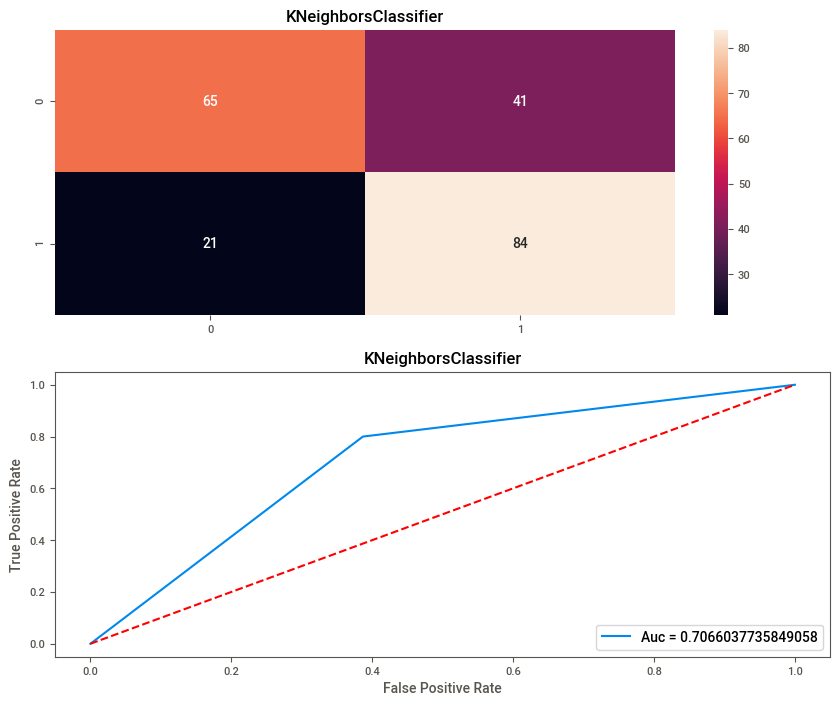

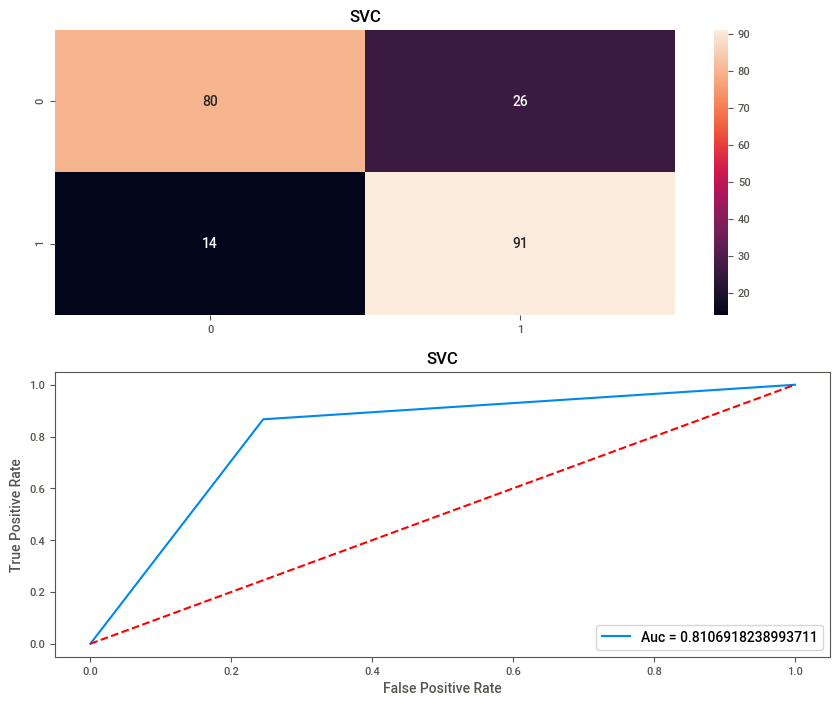

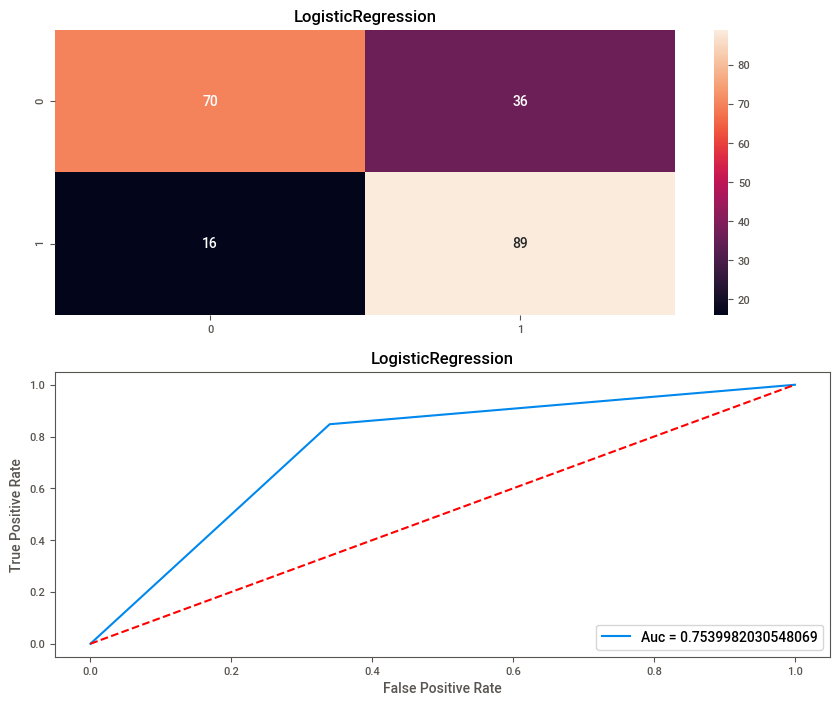

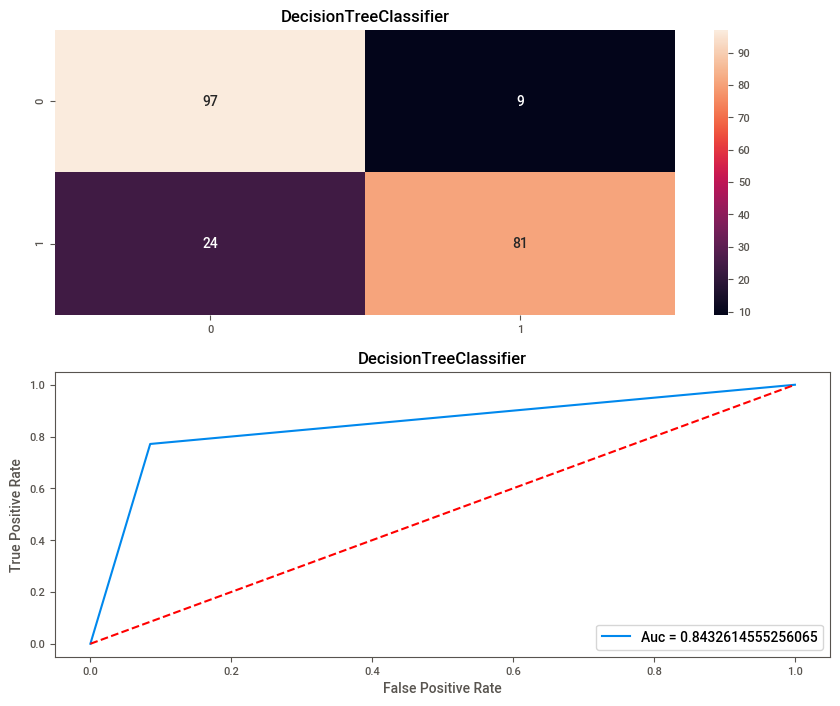

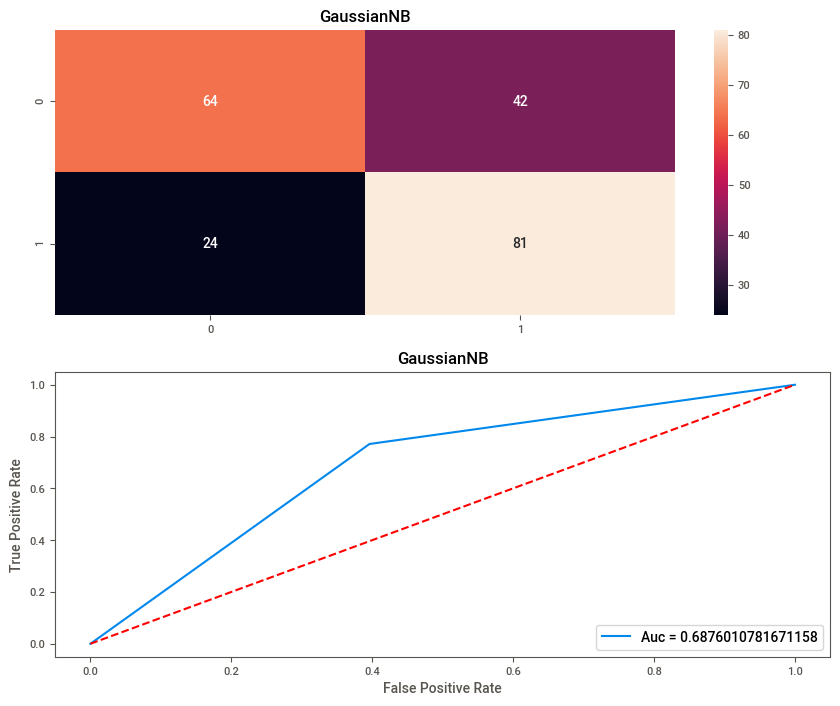

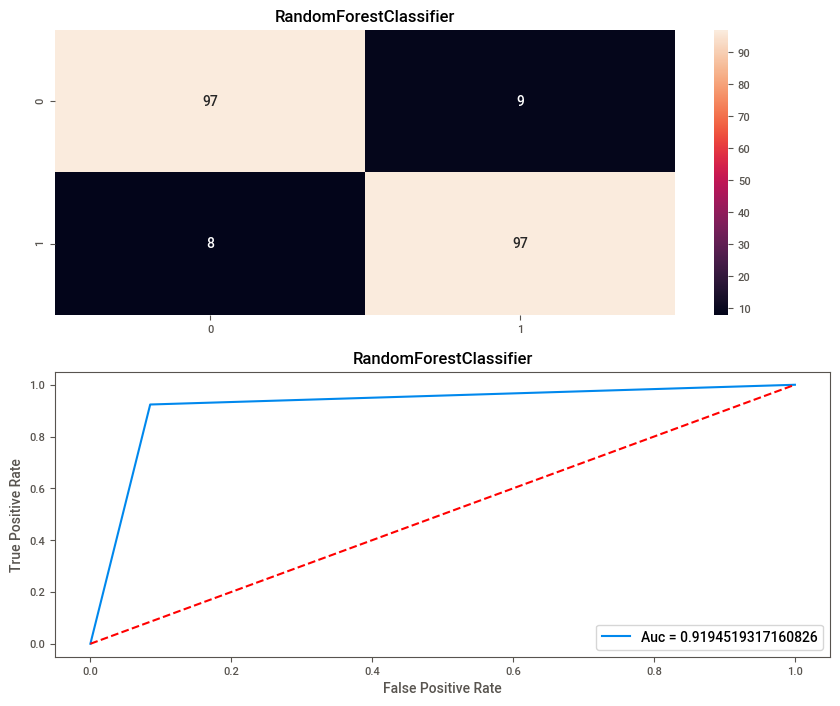

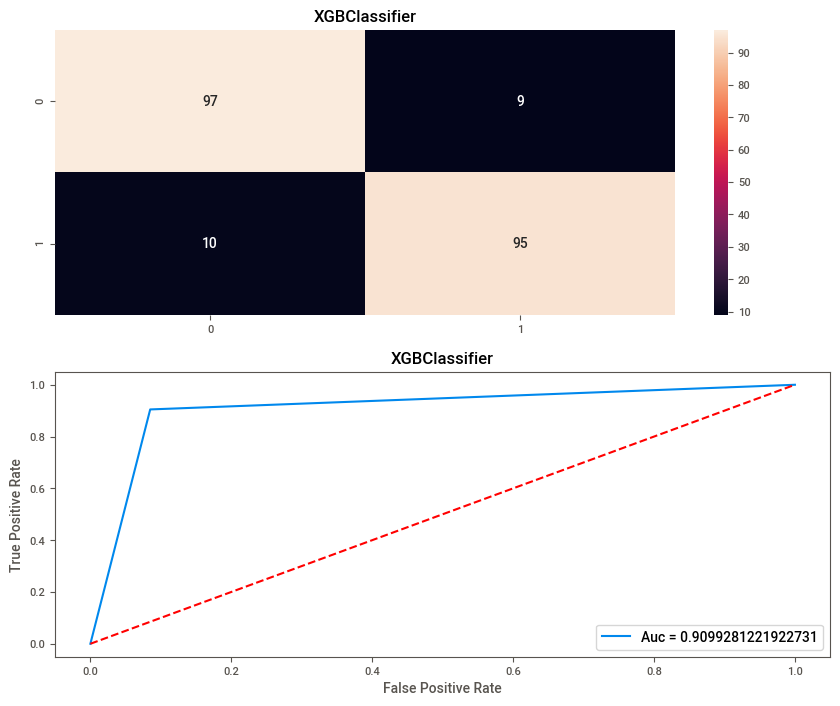

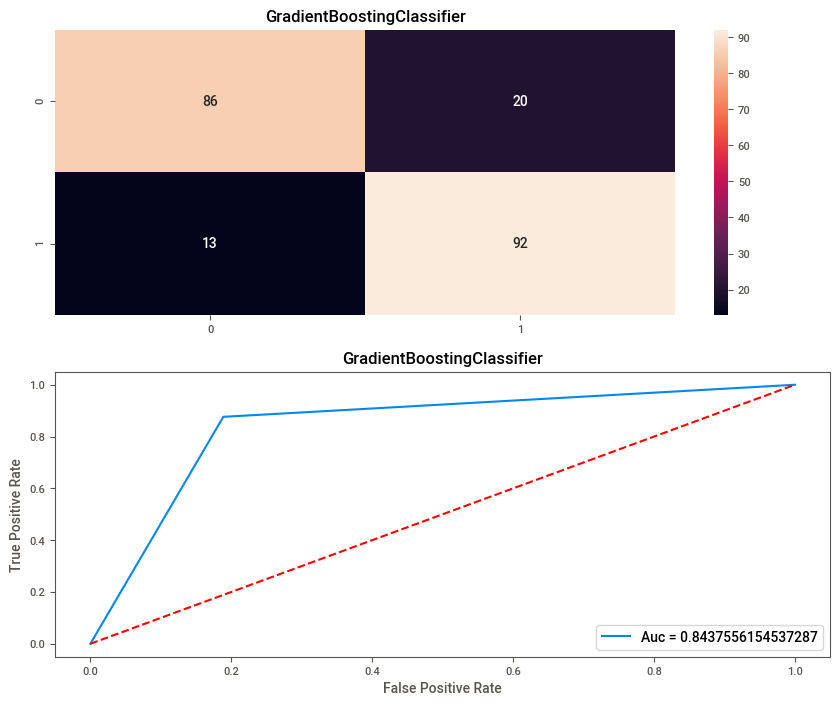

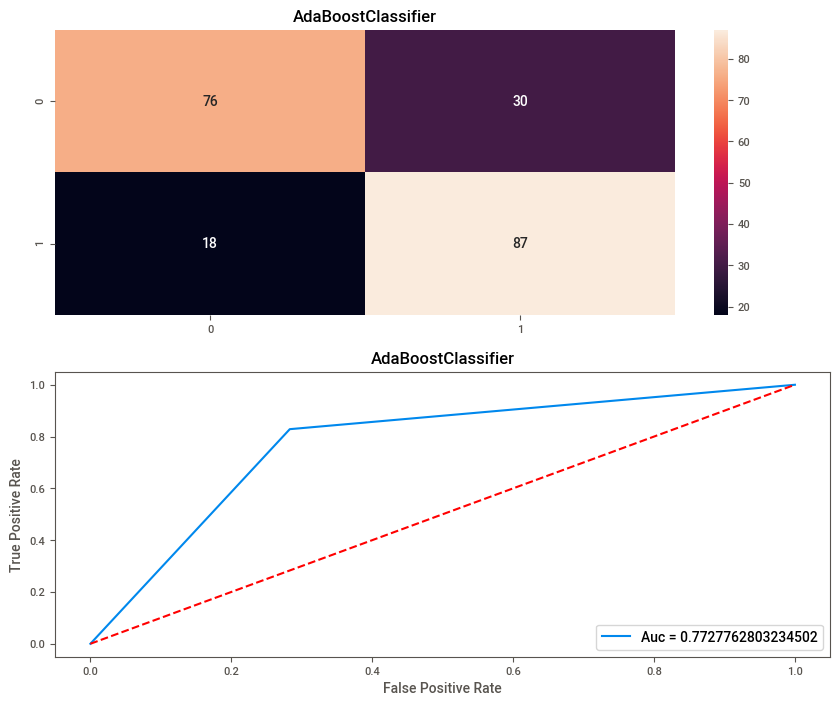

In [87]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [88]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'auc_score':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,auc_score
0,KNeighborsClassifier,70.616114,80.000000,71.333333,70.660377
1,SVC,81.042654,86.666667,78.935574,81.069182
2,LogisticRegression,75.355450,84.761905,75.121849,75.399820
3,DecisionTreeClassifier,84.360190,77.142857,86.039216,84.326146
4,GaussianNB,68.720379,77.142857,71.204482,68.760108
5,RandomForestClassifier,91.943128,92.380952,89.474790,91.945193
6,XGBClassifier,90.995261,90.476190,86.756303,90.992812
7,GradientBoostingClassifier,84.360190,87.619048,80.239496,84.375562
8,AdaBoostClassifier,77.251185,82.857143,76.210084,77.277628


In [40]:
#We can see from the table RandomForestClassifier is the best performing Algorithms.

#to improve the score we will apply gridsearchcv technique to the top the performing models.

In [41]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [90]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   77   which is   0.7677725118483413
knn 77
max_accuracy_score is at random_state   57   which is   0.8293838862559242
svc 57
max_accuracy_score is at random_state   55   which is   0.7772511848341233
lr 55
max_accuracy_score is at random_state   46   which is   0.9146919431279621
dt 46
max_accuracy_score is at random_state   54   which is   0.7725118483412322
gnb 54
max_accuracy_score is at random_state   42   which is   0.909952606635071
rfc 42
max_accuracy_score is at random_state   43   which is   0.9241706161137441
xgb 43
max_accuracy_score is at random_state   76   which is   0.8530805687203792
gbc 76
max_accuracy_score is at random_state   65   which is   0.8199052132701422
ada 65


# GridSearchCV

# model-1-->AdaBoostClassifier(random_state=65)81.99%

In [91]:
ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,stratify=y)

In [92]:
parameters=[{'base_estimator':[lr,xgb,gbc],'n_estimators':[100,250,500],'learning_rate':[0.1,0.001,1]}]
            
grid_search=GridSearchCV(ada,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'base_estimator': GradientBoostingClassifier(),
 'learning_rate': 1,
 'n_estimators': 100}

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,stratify=y)
ada=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(random_state=76),n_estimators=100,learning_rate=1)
ada.fit(x,y)
pred_ada=ada.predict(x_test)
score=accuracy_score(y_test,pred_ada)
print('Accuracy=  ',score)
print('recall_score=  ',recall_score(y_test,pred_ada))
print('roc_score='     ,roc_auc_score(y_test,pred_ada))

Accuracy=   1.0
recall_score=   1.0
roc_score= 1.0


In [97]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
ada=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(random_state=76),n_estimators=100,learning_rate=1)
cvs=cross_val_score(ada,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(ada,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8553781512605042


array([[385,  61],
       [ 37, 361]], dtype=int64)

# model2->DecesionTreeClassifier(random_state=46)=91.46%

In [98]:
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [99]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
            
grid_search=GridSearchCV(dt,parameters,scoring='recall',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2}

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,max_depth=7)
dt.fit(x,y)
pred_dt=dt.predict(x_test)
score=accuracy_score(y_test,pred_dt)
print('Accuracy_score=  ',score)
print('recall_score=  ',recall_score(y_test,pred_dt))
print('roc_score='     ,roc_auc_score(y_test,pred_dt))

Accuracy_score=   0.7772511848341233
recall_score=   0.8018867924528302
roc_score= 0.7771338724168912


In [101]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,max_depth=7)
cvs=cross_val_score(dt,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(dt,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8458823529411765


array([[280,  70],
       [142, 352]], dtype=int64)

# model3->RandomForestClassifier(random_state=42)=90.99%

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
rfc=RandomForestClassifier()

In [103]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='recall',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=2,max_depth=5,n_estimators=100)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy=   0.8009478672985783
recall_score=   0.9801980198019802
roc_score= 0.8082808280828082


In [105]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=2,max_depth=5,n_estimators=100)
cvs=cross_val_score(rfc,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8955182072829132


array([[264,  41],
       [158, 381]], dtype=int64)

# model-4-->XGBoostClassifier(accuracy=84.32%) at random_state=46

In [106]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [107]:
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'colsample_bytree': 0.7, 'learning_rate': 0.4, 'max_depth': 6}

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.4,max_depth=6,colsample_bytree=0.7)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy_score=   1.0
recall_score=   0.6698113207547169
roc_score= 0.5110961365678347


In [110]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(learning_rate=0.4,max_depth=6,colsample_bytree=0.7)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8910326852634546


array([[389,  59],
       [ 33, 363]], dtype=int64)

# Saving the final RandomForestClassifier model

In [111]:
#From all the model tried above RandomForestClassifier model's has best score for both class 1(0.92),0(0.92)
#cross_val_score is also high.
#hence saving the RandomForestClassifier model.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=2,max_depth=5,n_estimators=100)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy=   0.8009478672985783
recall_score=   0.9504950495049505
roc_score= 0.807065706570657


In [115]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=2,max_depth=5,n_estimators=100)
rfc.fit(x,y)
cvs=cross_val_score(rfc,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8907563025210085


array([[268,  43],
       [154, 379]], dtype=int64)

In [117]:
import joblib
joblib.dump(rfc,'project7-fraudloandetectionriv-1.obj')

['project7-fraudloandetectionriv-1.obj']

In [118]:
model=joblib.load('project7-fraudloandetectionriv-1.obj')

In [119]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['Fraud yes(1)no(0)'])
Final_predictions[:5]

,Fraud yes(1)no(0)
0,1
1,1
2,1
3,0
4,1


# Saving final predictions in file.csv format

In [120]:
Final_predictions.to_csv('E:\\final_predictionsfraudriv-1.csv',index=False)

# Conclusion:-